In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
# from tqdm import tqdm
from statistics import fmean
import ot
from scipy import stats

In [2]:
# true_glob = glob('DATA/MIMIC_III/MIMIC_subset_mcar/devel_2_train_0_train_missing_0.5_test_missing_0.5*')
true_glob = glob('DATA/MIMIC_III/MIMIC_subset_mcar/holdout_2_train_missing_0.5_test_missing_0.5*')

assert len(true_glob)==1
true_df = pd.read_csv(true_glob[0]).drop(columns=['Unnamed: 0','expired'])
true_df.head()

0          1          2          3          4          5  \
0        NaN        NaN  77.812500   8.093954  67.517245   8.126275   
1        NaN   8.695241        NaN        NaN        NaN        NaN   
2  61.977612        NaN  99.904412  13.725283  82.440299   8.958984   
3  50.966480        NaN  82.482759        NaN  80.574074  12.879401   
4        NaN  15.066507        NaN        NaN  81.685881  16.393734   

           6         7          8         9          10         11  12  \
0        NaN  2.410996  20.531250       NaN  107.793103        NaN NaN   
1        NaN  1.919370  22.061728  5.211395   93.800000        NaN NaN   
2  97.726619  1.925443        NaN  6.013278         NaN        NaN NaN   
3  98.055172       NaN  12.353591       NaN  114.815642        NaN NaN   
4  97.686275  1.581015        NaN  3.890033  121.096154  21.144934 NaN   

         13  
0  0.245414  
1  0.610843  
2       NaN  
3  0.416063  
4  0.522177

In [3]:
imp_path = 'IMPUTED_DATA/MIMIC/GAIN/hparam_-1/train_per_0.5/test_per_0.5/holdout_2.0/val_0.0/'

imp_glob = glob(imp_path+'*')
len(imp_glob)
#assert len(imp_glob)==11

11

In [5]:
"""
for repeat_path in imp_glob:
    train_glob = glob(repeat_path+'/*test*')
    assert len(train_glob)==1
    imp_np = np.load(train_glob[0])
    
    imp_df_rep = pd.DataFrame(imp_np, index=list(true_df.index),  columns=list(true_df.columns))

    plt.hist(true_df['6'], 20,alpha=0.5, density=True)
    plt.hist(imp_df_rep['6'], 20,alpha=0.5, density=True)
    plt.title(repeat_path)
    plt.show()
"""

"\nfor repeat_path in imp_glob:\n    train_glob = glob(repeat_path+'/*test*')\n    assert len(train_glob)==1\n    imp_np = np.load(train_glob[0])\n    \n    imp_df_rep = pd.DataFrame(imp_np, index=list(true_df.index),  columns=list(true_df.columns))\n\n    plt.hist(true_df['6'], 20,alpha=0.5, density=True)\n    plt.hist(imp_df_rep['6'], 20,alpha=0.5, density=True)\n    plt.title(repeat_path)\n    plt.show()\n"

In [6]:
# show the distances for each feature

In [7]:
dt = pd.read_csv('~/rds/rds-cbs31-cmih-covid19/imputationFiles/handling_missing_data/DATA/MIMIC_III/MIMIC_rand_sub.csv')

In [8]:
MIMIC_org = dt.iloc[: , :-1]
results   = pd.DataFrame()
featurewise_res = pd.DataFrame()

In [9]:
ind_df=pd.DataFrame()
from sklearn.model_selection import KFold
indeces=pd.DataFrame()
path='./IMPUTED_DATA/MIMIC/'
IDX = np.arange(len(dt))
number_of_folds = 5
number_of_splits = 3
kf_outter = KFold(n_splits=number_of_splits, random_state=1896, shuffle= True)
for i, out_split in enumerate(kf_outter.split(IDX)):
    IDX_TRAIN, IDX_TEST = IDX[out_split[0]], IDX[out_split[1]]
    #print(len(IDX_TRAIN),len(IDX_TEST))
    kf_inner = KFold(n_splits=number_of_folds,random_state=165782*i, shuffle= True)
    IDX_inn = np.arange(len(IDX_TRAIN))
    for j, inn_split in enumerate(kf_inner.split(IDX_inn)):
        train_fold, val_fold = IDX_TRAIN[inn_split[0]], IDX_TRAIN[inn_split[1]]
        #print(len(train_fold),len(val_fold))
        temp = {'test_round':i, 'val_round':j, 'test_ind':IDX_TEST, 'train_ind':train_fold, 'val_ind':val_fold}
        ind_df= ind_df.append(temp,ignore_index=True)

/tmp/ipykernel_44281/1754156800.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ind_df= ind_df.append(temp,ignore_index=True)
/tmp/ipykernel_44281/1754156800.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ind_df= ind_df.append(temp,ignore_index=True)
/tmp/ipykernel_44281/1754156800.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ind_df= ind_df.append(temp,ignore_index=True)
/tmp/ipykernel_44281/1754156800.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ind_df= ind_df.append(temp,ignore_index=True)
/tmp/ipykernel_44281/1754156800.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [10]:
ind_df

test_round  val_round                                           test_ind  \
0            0          0  [0, 5, 11, 12, 16, 19, 25, 29, 32, 33, 34, 36,...   
1            0          1  [0, 5, 11, 12, 16, 19, 25, 29, 32, 33, 34, 36,...   
2            0          2  [0, 5, 11, 12, 16, 19, 25, 29, 32, 33, 34, 36,...   
3            0          3  [0, 5, 11, 12, 16, 19, 25, 29, 32, 33, 34, 36,...   
4            0          4  [0, 5, 11, 12, 16, 19, 25, 29, 32, 33, 34, 36,...   
5            1          0  [1, 2, 4, 6, 7, 8, 9, 10, 13, 17, 18, 20, 22, ...   
6            1          1  [1, 2, 4, 6, 7, 8, 9, 10, 13, 17, 18, 20, 22, ...   
7            1          2  [1, 2, 4, 6, 7, 8, 9, 10, 13, 17, 18, 20, 22, ...   
8            1          3  [1, 2, 4, 6, 7, 8, 9, 10, 13, 17, 18, 20, 22, ...   
9            1          4  [1, 2, 4, 6, 7, 8, 9, 10, 13, 17, 18, 20, 22, ...   
10           2          0  [3, 14, 15, 21, 26, 27, 28, 31, 35, 40, 41, 42...   
11           2          1  [3, 14, 15, 21, 26, 27, 28, 31, 35, 40, 41, 42...   
12           2          2  [3, 14, 15, 21, 26, 27, 28, 31, 35, 40, 41, 42...   
13           2          3  [3, 14, 15, 21, 26, 27, 28, 31, 35, 40, 41, 42...   
14           2          4  [3, 14, 15, 21, 26, 27, 28, 31, 35, 40, 41, 42...   

                                            train_ind  \
0   [1, 3, 4, 6, 7, 8, 9, 10, 14, 15, 18, 20, 21, ...   
1   [1, 2, 3, 4, 8, 9, 10, 13, 15, 17, 18, 22, 24,...   
2   [1, 2, 4, 6, 7, 9, 13, 14, 17, 20, 21, 22, 23,...   
3   [1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 15, 17, 1...   
4   [2, 3, 6, 7, 8, 10, 13, 14, 15, 17, 18, 20, 21...   
5   [0, 3, 5, 11, 14, 16, 19, 21, 25, 26, 27, 28, ...   
6   [0, 3, 5, 11, 12, 14, 15, 16, 19, 21, 26, 28, ...   
7   [0, 3, 12, 14, 15, 16, 19, 25, 26, 27, 28, 29,...   
8   [3, 5, 11, 12, 15, 21, 25, 26, 27, 29, 31, 32,...   
9   [0, 5, 11, 12, 14, 15, 16, 19, 21, 25, 27, 28,...   
10  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17...   
11  [0, 2, 4, 5, 7, 8, 9, 10, 13, 16, 17, 22, 23, ...   
12  [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 1...   
13  [1, 4, 6, 7, 10, 11, 12, 13, 16, 17, 18, 19, 2...   
14  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 17, 18, 1...   

                                              val_ind  
0   [2, 13, 17, 30, 31, 43, 44, 48, 55, 58, 60, 63...  
1   [6, 7, 14, 20, 21, 23, 46, 49, 51, 52, 68, 72,...  
2   [3, 8, 10, 15, 18, 24, 27, 40, 41, 56, 57, 65,...  
3   [22, 26, 47, 50, 53, 59, 64, 73, 74, 75, 79, 8...  
4   [1, 4, 9, 28, 35, 39, 42, 69, 82, 83, 103, 107...  
5   [12, 15, 29, 32, 33, 50, 61, 85, 96, 97, 100, ...  
6   [25, 27, 34, 38, 43, 46, 56, 62, 86, 93, 110, ...  
7   [5, 11, 21, 42, 45, 54, 63, 80, 84, 88, 95, 10...  
8   [0, 14, 16, 19, 28, 35, 36, 37, 44, 49, 60, 66...  
9   [3, 26, 31, 40, 41, 48, 52, 73, 78, 90, 113, 1...  
10  [13, 33, 54, 75, 80, 92, 93, 98, 99, 109, 124,...  
11  [1, 6, 11, 12, 18, 19, 20, 24, 34, 37, 38, 45,...  
12  [4, 17, 23, 25, 29, 30, 47, 55, 57, 58, 59, 64...  
13  [0, 2, 5, 8, 9, 22, 36, 39, 53, 67, 79, 82, 88...  
14  [7, 10, 16, 32, 61, 62, 69, 77, 83, 91, 94, 10...

In [11]:
# import ot

In [12]:
def KL(p,q):    
    """Kullback-Leibler divergence D(P || Q) for discrete distributions Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p0 = np.asarray(p+np.finfo(float).eps, dtype=float)#self.org_normv+np.finfo(float).eps, dtype=np.float)
    q0 = np.asarray(q+np.finfo(float).eps, dtype=float)#self.imp_normv+np.finfo(float).eps, dtype=np.float)
    kl = np.sum(np.where((p != 0) & (q != 0), p0 * np.log(p0 / q0), 0))
    # kl = np.sum(np.where(p != 0, p * np.log(p / q), 0))
    if kl < 0:
        print("Have KL < 0")
        print(f"p = {p}")
        print(f"q = {q}")
    return kl

class NormalizationDistMatrix:
    """
    return two dataframe with the equal number of rows and columns (features) provided by the
    binning of the values of each column (feature) in a range of min and max of the feature in 
    both imputed and original dataset.
    ---------------------------------------------------------------------------------------
    Parameters:
    original_data: the original dataset (nsample x ncolumn)
    imputed_data:  the imputed dataset (10 rep * nsample x ncolumn)
    """
    def __init__( self, original_data, imputed_data):
        self.org_dt = original_data
        self.imp_dt = imputed_data
        all_dist = np.concatenate((self.org_dt, self.imp_dt), axis=0)
        self.min_val=np.min(all_dist, axis=0)
        self.max_val=np.max(all_dist, axis=0)

    def hist_bin(self, a, min_v, max_v, nbins=1000, verbose=False):
        #if verbose: print(min_v, max_v)
        
        ahist = (np.histogram(a, range=(min_v, max_v), bins=nbins, density=True)[0])
        #if verbose: print(ahist)
        return ahist*((max_v-min_v)/nbins)
    
    def column_wise_normilized_dist(self, dt, min_arr, max_arr):
        results_normv_mat=pd.DataFrame()
        for i in range(dt.shape[1]):
            if i ==6:
                verb = True
            else:
                verb = False
            col = dt.columns[i]
            results_normv_mat[i]=self.hist_bin(dt[col], min_arr[i], max_arr[i], nbins=1000, verbose=verb)

        return(results_normv_mat) 
    
    def norm_dist_mat_cal(self):
        results_org=pd.DataFrame()
        results_imp=pd.DataFrame()
        results_org=self.column_wise_normilized_dist(self.org_dt, self.min_val, self.max_val)
        results_imp=self.column_wise_normilized_dist(self.imp_dt, self.min_val, self.max_val)

        return results_org, results_imp


In [13]:
Imp_method=['MICE','GAIN', 'MissForest', 'MIWAE', 'Mean']
rep=[0,1,2,3,4,5,6,7,8,9]
hout=['0.0', '1.0', '2.0']
val=['0.0', '1.0', '2.0', '3.0', '4.0']
train_mrate=['0.25','0.5'] #, '0.5']
test_mrate=['0.25','0.5']

In [14]:
dist_df = pd.read_csv('IMPUTED_DATA/mimic-distances.csv')
#dist_df = dist_df.loc[dist_df['imputation']=='MIWAE']

In [15]:
dist_df.sort_values('distance', ascending=False).head(40)

imputation  holdout  train_missing  test_missing  validation  repeat  \
277458        GAIN        2           0.50          0.50           0       4   
277208        GAIN        2           0.50          0.50           0       4   
277408        GAIN        2           0.50          0.50           0       4   
277058        GAIN        2           0.50          0.50           0       4   
277258        GAIN        2           0.50          0.50           0       4   
277158        GAIN        2           0.50          0.50           0       4   
277358        GAIN        2           0.50          0.50           0       4   
277008        GAIN        2           0.50          0.50           0       4   
277108        GAIN        2           0.50          0.50           0       4   
277308        GAIN        2           0.50          0.50           0       4   
1403710      MIWAE        2           0.25          0.25           0       7   
277096        GAIN        2           0.50          0.50           0       4   
1403702      MIWAE        2           0.25          0.25           0       7   
277246        GAIN        2           0.50          0.50           0       4   
277496        GAIN        2           0.50          0.50           0       4   
277196        GAIN        2           0.50          0.50           0       4   
1403736      MIWAE        2           0.25          0.25           0       7   
277046        GAIN        2           0.50          0.50           0       4   
1403738      MIWAE        2           0.25          0.25           0       7   
277446        GAIN        2           0.50          0.50           0       4   
277146        GAIN        2           0.50          0.50           0       4   
277296        GAIN        2           0.50          0.50           0       4   
277396        GAIN        2           0.50          0.50           0       4   
277346        GAIN        2           0.50          0.50           0       4   
1403716      MIWAE        2           0.25          0.25           0       7   
1403729      MIWAE        2           0.25          0.25           0       7   
294565        GAIN        2           0.50          0.50           3       9   
294965        GAIN        2           0.50          0.50           3       9   
294665        GAIN        2           0.50          0.50           3       9   
294765        GAIN        2           0.50          0.50           3       9   
294615        GAIN        2           0.50          0.50           3       9   
294515        GAIN        2           0.50          0.50           3       9   
294915        GAIN        2           0.50          0.50           3       9   
294715        GAIN        2           0.50          0.50           3       9   
294865        GAIN        2           0.50          0.50           3       9   
1403741      MIWAE        2           0.25          0.25           0       7   
277462        GAIN        2           0.50          0.50           0       4   
1403705      MIWAE        2           0.25          0.25           0       7   
277062        GAIN        2           0.50          0.50           0       4   
277262        GAIN        2           0.50          0.50           0       4   

         split  direction  distance  baseline_distance  distance_ratio  \
277458       9          8  4.640489           0.017774      261.084151   
277208       4          8  4.598966           0.027819      165.318114   
277408       8          8  4.236424           0.006215      681.638224   
277058       1          8  4.164660           0.010880      382.781793   
277258       5          8  4.147716           0.018524      223.915391   
277158       3          8  3.933233           0.022425      175.396028   
277358       7          8  3.929749           0.011928      329.455327   
277008       0          8  3.917119           0.012570      311.621449   
277108       2          8  3.902229           0.014760      2

array(['GAIN', 'Mean', 'MICE', 'MissForest', 'MIWAE'], dtype=object)

In [32]:
kk11 = 0
for i in dist_df['imputation'].unique():
    print(i)
    for tr in train_mrate:
        print(tr)
        for ts in test_mrate:
            print(ts)
            for h in hout: 
                for v in val:
                    kk10 = 0

                    ts_ind=ind_df[(ind_df['test_round']==int(float(h)))&(ind_df['val_round']==int(float(v)))]['test_ind'].values[0]
                    org_ts=MIMIC_org.loc[ts_ind]

                    org0 = org_ts
                    for r in rep:

                        #print(path+i+"/hparam_-1/train_per_"+tr+"/test_per_"+ts+"/holdout_"+h+"/val_"+v+ "/m_" + str(r)+"/imputed_test_x.csv")
                            
                        if i=='MICE':
                            imp_ts=pd.read_csv(path+i+"/hparam_-1/train_per_"+tr+"/test_per_"+ts+"/holdout_"+h+"/val_"+v+ "/m_" + str(r)+"/imputed_test_x.csv")
                        else:
                            imp_ts=pd.DataFrame(np.load(path+i+"/hparam_-1/train_per_"+tr+"/test_per_"+ts+"/holdout_"+h+"/val_"+v+ "/m_" + str(r)+"/imputed_test_x.npy"))

                        imp0 = imp_ts
                        ks_dist=[]
                        w_dist=[]
                        kl_dist=[]
                        
                        #print(imp.shape)
                        
                        norm_dis_mat_ts = NormalizationDistMatrix(org0,imp0)
                        org, imp = norm_dis_mat_ts.norm_dist_mat_cal()
                        
                        #print(imp.shape)
                        for c in range(imp_ts.shape[1]):
                            #print(c)
                            w_dist.append(ot.emd2_1d(org.iloc[:,c].values, imp.iloc[:,c].values))
                            ks_dist.append(stats.ks_2samp(org.iloc[:,c], imp.iloc[:,c])[0])
                            kl_dist.append(KL(org.iloc[:,c].values, imp.iloc[:,c].values))
                            
                        W_dist=np.array(w_dist)#np.mean([w_dist_tr,w_dist_val,w_dist_ts], axis=0)
                        KS_dist=np.array(ks_dist)#np.mean([ks_dist_tr,ks_dist_val,ks_dist_ts], axis=0)
                        kl_dist=np.array(kl_dist)#np.mean([kl_dist_tr,kl_dist_val,kl_dist_ts], axis=0)
                        
                        df = {'hold_out': h, 'val': v, 'imputation': i, 'train_missing':tr, 'test_missing':ts, 'w_dist':W_dist, 'KL':kl_dist, 'KS':KS_dist}#, 'CM':CM_dist}
                        
                        df2 = pd.DataFrame(columns=list(df.keys()),index=[0])
                        for keys in df.keys():
                            if isinstance(df[keys],(np.ndarray)):
                                df2[keys].iloc[0] = list(df[keys])
                            else:
                                df2[keys].iloc[0] = df[keys]
        
                        if kk10 == 0:
                            featurewise_res = df2
                        else:
                            featurewise_res = pd.concat([featurewise_res,df2], ignore_index = True)                        
                        kk10+=1
                        
                    arr = []
                    for row in featurewise_res['w_dist']:
                        arr.append(row)
                    
                    """
                    fig, ax = plt.subplots(nrows=1,ncols=1)
                    plt.imshow(np.stack(arr,0), cmap='jet')
                    plt.xlabel('Features')
                    plt.ylabel('Imp. Repeats')
                    plt.colorbar()
                    plt.title('imp: '+i+', train_p: '+str(tr)+', test_p: '+str(ts)+', hold: '+str(h)+', val: '+str(v))
                    plt.show()
                    """
                    
                    cols1 = ['imp_method','train_miss','test_miss','hold_out','val']
                    for thold in [1.0e-8, 1.5e-8, 1.0e-7, 1.5e-7, 1.0e-6, 1.5e-6, 1.0e-5, 1.5e-5, 1.0e-4, 1.5e-4, 1.0e-3, 1.5e-3, 1.0e-2, 1.5e-2, 1.0e-1]:
                        cols1+=['outlier_count_'+str(thold)]
                        
                    df3 = pd.DataFrame(columns=cols1,index=[0])
                    df3['imp_method'].iloc[0] = i
                    df3['hold_out'].iloc[0] = h
                    df3['val'].iloc[0] = v
                    df3['train_miss'].iloc[0] = tr
                    df3['test_miss'].iloc[0] = ts
                    for thold in [1.0e-8, 1.5e-8, 1.0e-7, 1.5e-7, 1.0e-6, 1.5e-6, 1.0e-5, 1.5e-5, 1.0e-4, 1.5e-4, 1.0e-3, 1.5e-3, 1.0e-2, 1.5e-2, 1.0e-1]:
                        df3['outlier_count_'+str(thold)].iloc[0] = (np.stack(arr,0)>thold).sum()
                    if kk11 == 0:
                        outlier_counts = df3
                    else:
                        outlier_counts = pd.concat([outlier_counts,df3], ignore_index = True)                        
                    kk11+=1
                    

GAIN
0.25
0.25
0.5


KeyboardInterrupt: 

In [33]:
#outlier_counts.to_csv('outliers.csv')
outlier_counts = pd.read_csv('outliers.csv')

In [40]:
outlier_counts

Unnamed: 0 imp_method  train_miss  test_miss  hold_out  val  \
0             0       MICE        0.25       0.25       0.0  0.0   
1             1       MICE        0.25       0.25       0.0  1.0   
2             2       MICE        0.25       0.25       0.0  2.0   
3             3       MICE        0.25       0.25       0.0  3.0   
4             4       MICE        0.25       0.25       0.0  4.0   
..          ...        ...         ...        ...       ...  ...   
295         295       Mean        0.50       0.50       2.0  0.0   
296         296       Mean        0.50       0.50       2.0  1.0   
297         297       Mean        0.50       0.50       2.0  2.0   
298         298       Mean        0.50       0.50       2.0  3.0   
299         299       Mean        0.50       0.50       2.0  4.0   

     outlier_count_1e-08  outlier_count_1.5e-08  outlier_count_1e-07  \
0                    123                     47                    0   
1                    117                     38                    0   
2                    118                     47                    0   
3                    120                     41                    0   
4                    121                     44                    0   
..                   ...                    ...                  ...   
295                  140                    140                  140   
296                  140                    140                  140   
297                  140                    140                  140   
298                  140                    140                  140   
299                  140                    140                  140   

     outlier_count_1.5e-07  ...  outlier_count_1.5e-06  outlier_count_1e-05  \
0                        0  ...                      0                    0   
1                        0  ...                      0                    0   
2                        0  ...                      0                    0   
3                        0  ...                      0                    0   
4                        0  ...                      0                    0   
..                     ...  ...                    ...                  ...   
295                    140  ...                    140                  140   
296                    140  ...                    140                  140   
297                    140  ...                    140                  140   
298                    140  ...                    140                  140   
299                    140  ...                    140                  140   

     outlier_count_1.5e-05  outlier_count_0.0001  outlier_count_0.00015  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   
..                     ...                   ...                    ...   
295                    140                   140                    140   
296                    140                   140                    140   
297                    140                   140                    140   
298                    140                   140                    140   
299                    140                   140                    140   

     outlier_count_0.001  outlier_count_0.0015  outlier_count_0.01  \
0                      0                     0                   0   
1                      0                     0                   0   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   
..                   ...                   ...       

In [34]:
for trm in outlier_counts['train_miss'].unique():
    outlier_counts2 = outlier_counts.loc[outlier_counts['train_miss']==trm]
    for tsm in outlier_counts['test_miss'].unique():
        outlier_counts3 = outlier_counts2.loc[outlier_counts2['test_miss']==tsm]
        print(trm, tsm)

0.25 0.25
0.25 0.5
0.5 0.25
0.5 0.5


/tmp/ipykernel_44281/1041292346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)


Text(0, 0.5, 'Proportion of Outlier Imputations')

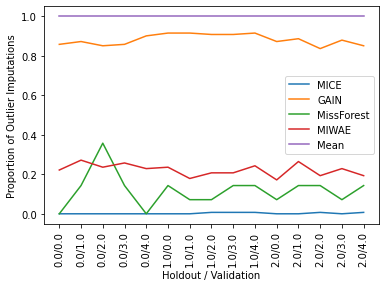

In [41]:
for imp in outlier_counts3['imp_method'].unique():
    outlier_counts4 = outlier_counts3.loc[outlier_counts3['imp_method']==imp]
    plt.plot(np.arange(len(outlier_counts4)),outlier_counts4['outlier_count_1e-07']/140, label=imp)
    
outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
#locs, labels = plt.xticks()
plt.xticks(np.arange(len(outlier_counts4['xlabel'])), outlier_counts4['xlabel'],rotation='vertical')
plt.legend()
plt.xlabel('Holdout / Validation')
plt.ylabel('Proportion of Outlier Imputations')

In [42]:
outlier_counts4

Unnamed: 0 imp_method  train_miss  test_miss  hold_out  val  \
285         285       Mean         0.5        0.5       0.0  0.0   
286         286       Mean         0.5        0.5       0.0  1.0   
287         287       Mean         0.5        0.5       0.0  2.0   
288         288       Mean         0.5        0.5       0.0  3.0   
289         289       Mean         0.5        0.5       0.0  4.0   
290         290       Mean         0.5        0.5       1.0  0.0   
291         291       Mean         0.5        0.5       1.0  1.0   
292         292       Mean         0.5        0.5       1.0  2.0   
293         293       Mean         0.5        0.5       1.0  3.0   
294         294       Mean         0.5        0.5       1.0  4.0   
295         295       Mean         0.5        0.5       2.0  0.0   
296         296       Mean         0.5        0.5       2.0  1.0   
297         297       Mean         0.5        0.5       2.0  2.0   
298         298       Mean         0.5        0.5       2.0  3.0   
299         299       Mean         0.5        0.5       2.0  4.0   

     outlier_count_1e-08  outlier_count_1.5e-08  outlier_count_1e-07  \
285                  140                    140                  140   
286                  140                    140                  140   
287                  140                    140                  140   
288                  140                    140                  140   
289                  140                    140                  140   
290                  140                    140                  140   
291                  140                    140                  140   
292                  140                    140                  140   
293                  140                    140                  140   
294                  140                    140                  140   
295                  140                    140                  140   
296                  140                    140                  140   
297                  140                    140                  140   
298                  140                    140                  140   
299                  140                    140                  140   

     outlier_count_1.5e-07  ...  outlier_count_1e-05  outlier_count_1.5e-05  \
285                    140  ...                  140                    140   
286                    140  ...                  140                    140   
287                    140  ...                  140                    140   
288                    140  ...                  140                    140   
289                    140  ...                  140                    140   
290                    140  ...                  140                    140   
291                    140  ...                  140                    140   
292                    140  ...                  140                    140   
293                    140  ...                  140                    140   
294                    140  ...                  140                    140   
295                    140  ...                  140                    140   
296                    140  ...                  140                    140   
297                    140  ...                  140                    140   
298                    140  ...                  140                    140   
299                    140  ...                  140                    140   

     outlier_count_0.0001  outlier_count_0.00015  outlier_count_0.001  \
285                   140                    140                    0   
286                   140                    140                    0   
287                   140                    140                    0   
288                   140                    140                    0   
289                   140                    140                    0   
290                   140                    140            

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

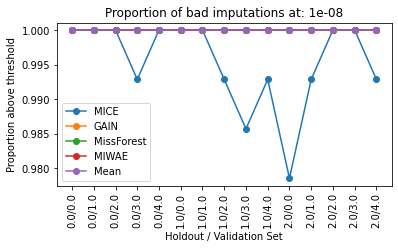

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

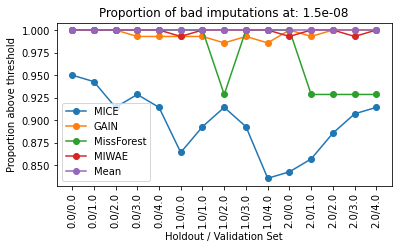

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

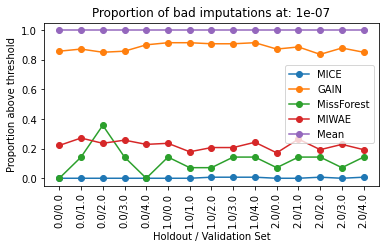

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

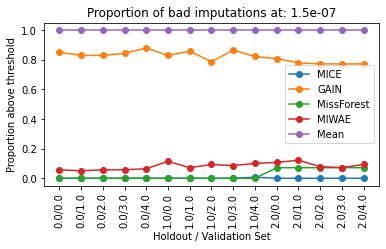

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

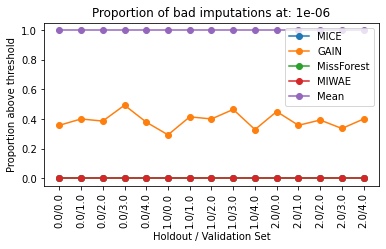

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

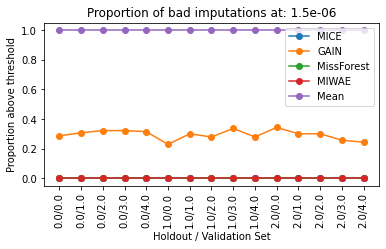

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

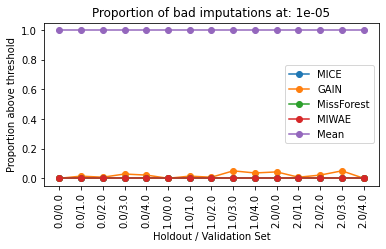

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

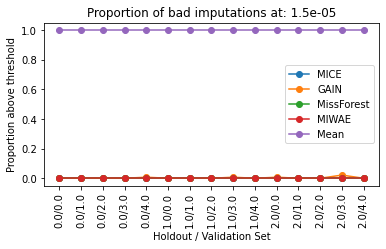

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

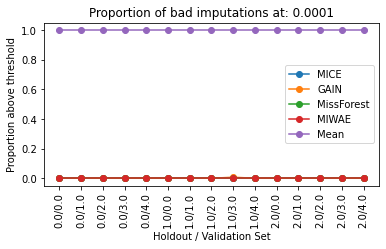

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

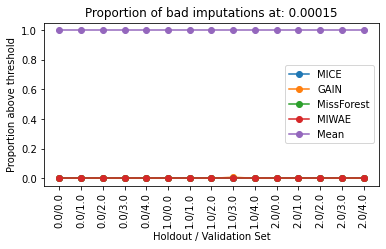

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

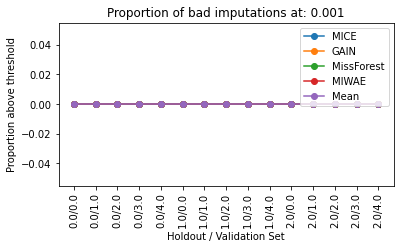

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

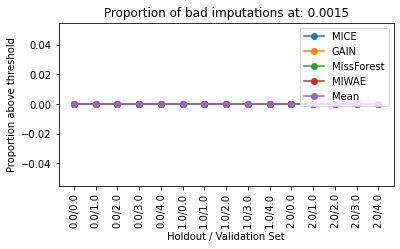

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

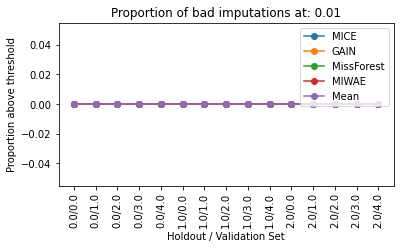

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

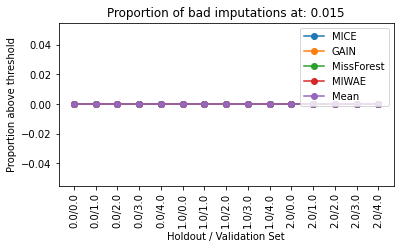

/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
/tmp/ipykernel_44281/1126847959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

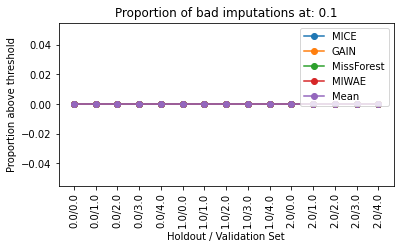

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.parasite_axes import SubplotHost


n=15
for thold in [1.0e-8, 1.5e-8, 1.0e-7, 1.5e-7, 1.0e-6, 1.5e-6, 1.0e-5, 1.5e-5, 1.0e-4, 1.5e-4, 1.0e-3, 1.5e-3, 1.0e-2, 1.5e-2, 1.0e-1]:
                        
    fig, ax = plt.subplots(1,1, figsize=(6,3))
    for imp in outlier_counts3['imp_method'].unique():
        outlier_counts4 = outlier_counts3.loc[outlier_counts3['imp_method']==imp]
        outlier_counts4['xlabel'] = outlier_counts4['hold_out'].astype(str)+'/'+outlier_counts4['val'].astype(str)
        x = np.arange(n)
        y = outlier_counts4['outlier_count_'+str(thold)]/140
        ax.plot(np.arange(len(outlier_counts4)),y, 'o-', label=imp)

    xlabels = outlier_counts4['xlabel']
    ax.set_title('Proportion of bad imputations at: '+str(thold))
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_xlabel('Holdout / Validation Set')
    ax.set_ylabel('Proportion above threshold')
    plt.legend()
    plt.show()
    
    #plt.savefig('Untitled Folder/'+str(thold)+'.png', dpi=200,bbox_inches='tight')
    #plt.close()


In [36]:
xlabels

105    0.0/0.0
106    0.0/1.0
107    0.0/2.0
108    0.0/3.0
109    0.0/4.0
110    1.0/0.0
111    1.0/1.0
112    1.0/2.0
113    1.0/3.0
114    1.0/4.0
115    2.0/0.0
116    2.0/1.0
117    2.0/2.0
118    2.0/3.0
119    2.0/4.0
Name: xlabel, dtype: object

In [37]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])